<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        This is 1 of 2 EDA workbooks.  This one is for the Customer Segmentation Model.
    </span>
</div>

<div style="background-color:skyblue; padding:12px; border-radius:6px;">
    <span style="color:black; font-weight:bold; font-size:16px;">
        Overall, the EDA indicates the need to log-transform and scale several skewed and/or wide-ranging numeric features, reduce redundant or highly correlated features before applying PCA, and use PCA to simplify the feature space and improve model stability.
    </span>
</div>

In [1]:
# Setup: imports & display options

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Pandas display options
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [2]:
# Load data

df = pd.read_csv('data/customer_model_df.csv')

## Basic dataset inspection steps

<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        Off the bat, a few features stand out for dropping : name, email address and the category flags (which are redundant with the category revenues and category counts). I will drop these during Pre-processing.
    </span>
</div>

#### code and output for df.head() and df.info()

In [3]:
df.head()

,customer_id,name,email,country,age,signup_date,marketing_opt_in,tenure_days,n_orders,total_revenue,mean_order_value,total_qty_purchased,n_products_purchased,n_categories_purchased,first_order_time,last_order_time,recency_days,n_events,n_views,n_add_to_cart,n_checkouts,n_purchase_events,n_sessions_with_events,views_per_session,cart_to_view_rate,purchase_to_cart_rate,qty_Beauty,qty_Books,qty_Electronics,qty_Fashion,qty_Home & Kitchen,qty_Sports,qty_Toys,rev_Beauty,rev_Books,rev_Electronics,rev_Fashion,rev_Home & Kitchen,rev_Sports,rev_Toys,flag_qty_Beauty,flag_qty_Books,flag_qty_Electronics,flag_qty_Fashion,flag_qty_Home & Kitchen,flag_qty_Sports,flag_qty_Toys
0,1,Jennifer Salinas,nicholas59@example.org,JP,71,2020-09-04,True,1883,2.0,115.39,57.695,3.0,2.0,2.0,2022-03-18 04:16:29,2025-06-25 16:02:53,128.0,41.0,28.0,8.0,3.0,2.0,5.0,5.600000,0.285714,0.250000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,126.00,0.0,0.0,0.0,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Phillip Ramos,christinarubio@example.com,IN,26,2020-04-05,False,2035,2.0,68.52,34.260,2.0,2.0,2.0,2023-12-16 17:48:30,2025-01-02 02:48:29,302.0,23.0,17.0,2.0,2.0,2.0,3.0,5.666667,0.117647,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,0.0,0.0,0.00,24.28,49.13,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3,Dawn Fowler,jessica03@example.org,BR,21,2023-08-31,True,792,1.0,66.72,66.720,1.0,1.0,1.0,2020-07-04 07:39:11,2020-07-04 07:39:11,1945.0,37.0,30.0,4.0,2.0,1.0,5.0,6.000000,0.133333,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,78.5,0.0,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Mario Butler,paula27@example.org,FR,63,2022-06-30,True,1219,2.0,279.86,139.930,5.0,3.0,2.0,2020-09-29 03:07:16,2023-08-01 00:50:26,822.0,40.0,29.0,6.0,3.0,2.0,9.0,3.222222,0.206897,0.333333,4.0,1.0,0.0,0.0,0.0,0.0,0.0,268.95,37.8,0.0,0.0,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,Amber Brown,kevin85@example.net,BR,19,2022-07-22,True,1197,3.0,271.29,90.430,4.0,4.0,3.0,2024-06-15 21:36:57,2025-01-30 02:03:28,274.0,51.0,34.0,9.0,5.0,3.0,9.0,3.777778,0.264706,0.333333,1.0,0.0,0.0,1.0,2.0,0.0,0.0,48.32,0.0,0.0,36.0,194.17,0.00,0.00,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              19945 non-null  int64  
 1   name                     19945 non-null  object 
 2   email                    19945 non-null  object 
 3   country                  19945 non-null  object 
 4   age                      19945 non-null  int64  
 5   signup_date              19945 non-null  object 
 6   marketing_opt_in         19945 non-null  bool   
 7   tenure_days              19945 non-null  int64  
 8   n_orders                 19945 non-null  float64
 9   total_revenue            19945 non-null  float64
 10  mean_order_value         19945 non-null  float64
 11  total_qty_purchased      19945 non-null  float64
 12  n_products_purchased     19945 non-null  float64
 13  n_categories_purchased   19945 non-null  float64
 14  first_order_time      

## Address missing values

In [5]:
# 2.1 Missing values per column (count & %)

missing_counts = df.isna().sum()
missing_pct = 100 * missing_counts / len(df)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)
}).sort_values("missing_pct", ascending=False)

missing_df


,missing_count,missing_pct
last_order_time,3677,18.44
first_order_time,3677,18.44
customer_id,0,0.00
purchase_to_cart_rate,0,0.00
qty_Books,0,0.00
qty_Electronics,0,0.00
qty_Fashion,0,0.00
qty_Home & Kitchen,0,0.00
qty_Sports,0,0.00
qty_Toys,0,0.00


<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        Only "last_order_time" and "first_order_time" have missing values (at 18.44%).  These are likely of customers who have never made any purchase on the website.  This occurence and even rate (18.44%) is not unusual for e-commerce sits.  But I need to confirm that this is truly the case for these entries.
    </span>
</div>


#### code and output investigating missing values for "last_order_time" and "first_order_time" 

In [6]:
# extract Subset: customers missing both first_order_time and last_order_time

missing_orders_df = df[
    df["first_order_time"].isna() & df["last_order_time"].isna()
].copy()

missing_orders_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3677.0,10004.455806,5722.189021,11.0,5151.000000,10009.000000,14901.0,20000.0
age,3677.0,46.194996,16.771452,18.0,31.000000,46.000000,61.0,75.0
tenure_days,3677.0,1073.684525,618.414881,0.0,539.000000,1076.000000,1620.0,2130.0
n_orders,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
total_revenue,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
mean_order_value,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
total_qty_purchased,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
n_products_purchased,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
n_categories_purchased,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
recency_days,3677.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        The table above confirms that the customers that have missing "first_order_time" and "last_order_time" have made zero purchases.  The problem is that their recency_days is 0, incorrectly representing their value to the business.  I  need to change the recency_days entries to reflect that they have not made any purchase.  I will leave first_order_time and last_order_time as NaT
    </span>
</div>

#### Changing recency days for customers who have not made any purchases yet

In [7]:
# 1. Convert date-like columns to datetime safely
date_cols = ["signup_date", "first_order_time", "last_order_time"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Sanity check
df[date_cols].dtypes

signup_date         datetime64[ns]
first_order_time    datetime64[ns]
last_order_time     datetime64[ns]
dtype: object

In [8]:
# 2. Use the max last_order_time as the end of the observation window
analysis_date = df["last_order_time"].max()

# Fallback: if everything is NaT for some reason, use max signup_date
if pd.isna(analysis_date):
    analysis_date = df["signup_date"].max()

analysis_date

Timestamp('2025-10-31 22:59:41')

In [9]:
# 3. Customers with no purchases and missing order timestamps
mask_non_purch = (
    df["first_order_time"].isna()
    & df["last_order_time"].isna()
    & (df["n_orders"] == 0)
)

mask_non_purch.sum()

3677

In [10]:
# 4. Only fix recency_days where it is currently 0 for non-purchasers
mask_fix = mask_non_purch & (df["recency_days"] == 0)

df.loc[mask_fix, "recency_days"] = (
    analysis_date - df.loc[mask_fix, "signup_date"]
).dt.days

# Quick check
df.loc[mask_fix, "recency_days"].describe()

count    3677.000000
mean     1073.684525
std       618.414881
min         0.000000
25%       539.000000
50%      1076.000000
75%      1620.000000
max      2130.000000
Name: recency_days, dtype: float64

<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        There are still 0 values for recency_days --- but I have confirmed that these are valid, and are of brand new accounts created on the last day of the observation window.  For them, “days since signup” really is 0. I will keep them in the dataset.  Please refer to hidden code block for more details.
    </span>
</div>

#### confirmation that accounts with recency_days == 0 are brand new accounts

In [11]:
# Recreate the non-purchaser mask
mask_non_purch = (
    df["first_order_time"].isna()
    & df["last_order_time"].isna()
    & (df["n_orders"] == 0)
)

# Who are non-purchasers with recency_days == 0?
mask_zero = mask_non_purch & (df["recency_days"] == 0)

mask_zero.sum()


2

In [12]:
# Print the analysis_date we used earlier
analysis_date

Timestamp('2025-10-31 22:59:41')

In [13]:
df.loc[mask_zero, ["signup_date", "first_order_time", "last_order_time", "n_orders", "recency_days"]].head()

,signup_date,first_order_time,last_order_time,n_orders,recency_days
9246,2025-10-31,NaT,NaT,0.0,0.0
9677,2025-10-31,NaT,NaT,0.0,0.0


## Check Non-numeric features

Insights from Geographic Information:
US is the country where the most orders come from (18.2%)
8 other countries each account for at least 5% of the orders.

Insights from Marketing Opt-Ins:
A little over than half of customers (55.5%) opted in marketing communications.

/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_1219/1016794661.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


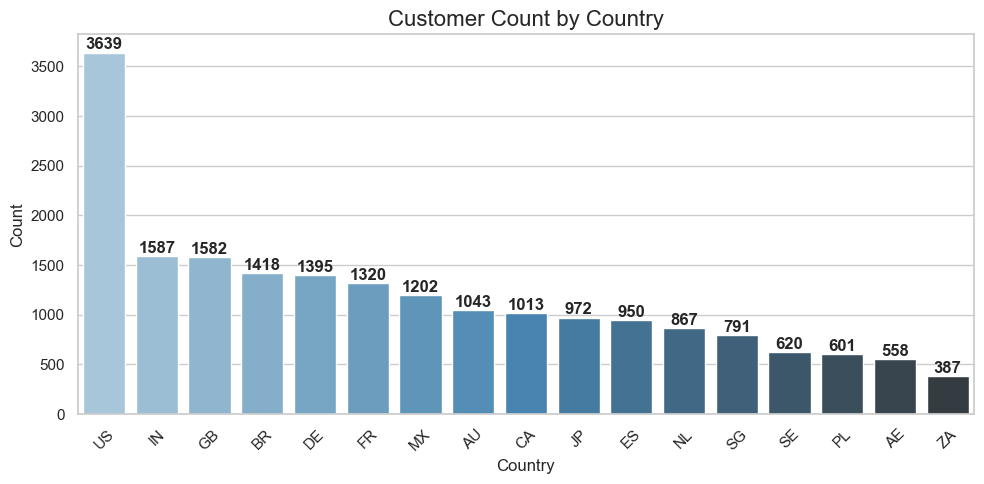

In [14]:
# check country column 

# Get counts
country_counts = df["country"].value_counts(dropna=False)

# Create figure
plt.figure(figsize=(10, 5))

# Bar chart
ax = sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    palette="Blues_d"
)

# Add value labels on top of bars
for i, value in enumerate(country_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title("Customer Count by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [15]:
# Value counts for marketing_opt_in
print("Marketing Opt-In value counts:")
print(df["marketing_opt_in"].value_counts(dropna=False))


Marketing Opt-In value counts:
marketing_opt_in
True     11068
False     8877
Name: count, dtype: int64


## Descriptive Statistics for numeric features

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - NEED FOR LOG TRANSFORMATION FOR HIGHLY SKEWED FEATURES & SCALING FOR FEATURES WITH WIDE RANGES
    - very long customer tenure and recency values (0-2130 days), high variance and skew
    - fequency is heavily skewed, many zero or one time buyers (suggesting a "occasional buyers" segment)
    - revenue and monetary values are very skewed, following classic pareto pattern (small number of "high revenue" customers)
    - event level features look "ok" but also skewed
    
    - OPPORTUNITY TO REDUCE DIMENSIONALITY FOR CATEGORY FIELDS (ie. Beauty, Book, Electronics....)
    - these features are sparse: with 70-90% customers have zero transactions in a given category

    - RATIO FEATURES: no red flags
</div>

#### code and output for .describe()

In [16]:
# Get all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

exclude_prefixes = ("flag", "customer_id")

numeric_cols = [
    col for col in numeric_cols 
    if not col.startswith(exclude_prefixes)
]

In [17]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,19945.0,46.489747,16.770127,18.0,32.000000,47.000000,61.000000,75.00
tenure_days,19945.0,1058.884031,613.452055,0.0,529.000000,1051.000000,1590.000000,2130.00
n_orders,19945.0,1.683630,1.291726,0.0,1.000000,2.000000,2.000000,9.00
total_revenue,19945.0,225.280395,262.368438,0.0,32.990000,146.030000,323.470000,3026.42
mean_order_value,19945.0,109.438160,122.458033,0.0,27.600000,82.910000,151.310000,2680.64
total_qty_purchased,19945.0,3.859313,3.635391,0.0,1.000000,3.000000,6.000000,28.00
n_products_purchased,19945.0,2.960792,2.573248,0.0,1.000000,2.000000,4.000000,18.00
n_categories_purchased,19945.0,2.377689,2.009228,0.0,1.000000,2.000000,3.000000,15.00
recency_days,19945.0,830.327852,593.049986,0.0,314.000000,726.000000,1291.000000,2130.00
n_events,19945.0,38.152820,17.569363,1.0,25.000000,36.000000,49.000000,124.00


## Univariate Distributions (Key Customer Features)
Focus first on RFM-like features and funnel metrics that are most relevant for segmentation.

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - Insights from histograms are consistent with that from the statistical tables generated by .describe()
    - RFM behavior: Heavy Skew, Long Tail and High Variability
    - Funnel engagement: distinct patterns in browsing, intent and conversions emerge
      * events and views cluster around moderate levels, with long tails of highly engaged users
      * add-to-cart, checkout and purchase events show large drop offs as customers move down the funnel
      * conversion efficiency metrics display wide variation, distinguishing decisive buyers from window shoppers and abandoners
</div>

#### code and output of histograms

In [18]:
# Define logical feature groups (based on column names in customer_model_df)

id_cols = ["customer_id", "name", "email"]

rfm_features = [
    "recency_days",
    "n_orders",
    "total_revenue",
    "mean_order_value",
    "total_qty_purchased",
    "n_products_purchased",
    "n_categories_purchased"
]

funnel_features = [
    "n_events",
    "n_views",
    "n_add_to_cart",
    "n_checkouts",
    "n_purchase_events",
    "n_sessions_with_events",
    "views_per_session",
    "cart_to_view_rate",
    "purchase_to_cart_rate"
]

qty_cols = [col for col in df.columns if col.startswith("qty_")]
rev_cols = [col for col in df.columns if col.startswith("rev_")]
flag_cols = [col for col in df.columns if col.startswith("flag_")]

rfm_features, funnel_features, qty_cols, rev_cols, flag_cols


(['recency_days',
  'n_orders',
  'total_revenue',
  'mean_order_value',
  'total_qty_purchased',
  'n_products_purchased',
  'n_categories_purchased'],
 ['n_events',
  'n_views',
  'n_add_to_cart',
  'n_checkouts',
  'n_purchase_events',
  'n_sessions_with_events',
  'views_per_session',
  'cart_to_view_rate',
  'purchase_to_cart_rate'],
 ['qty_Beauty',
  'qty_Books',
  'qty_Electronics',
  'qty_Fashion',
  'qty_Home & Kitchen',
  'qty_Sports',
  'qty_Toys'],
 ['rev_Beauty',
  'rev_Books',
  'rev_Electronics',
  'rev_Fashion',
  'rev_Home & Kitchen',
  'rev_Sports',
  'rev_Toys'],
 ['flag_qty_Beauty',
  'flag_qty_Books',
  'flag_qty_Electronics',
  'flag_qty_Fashion',
  'flag_qty_Home & Kitchen',
  'flag_qty_Sports',
  'flag_qty_Toys'])

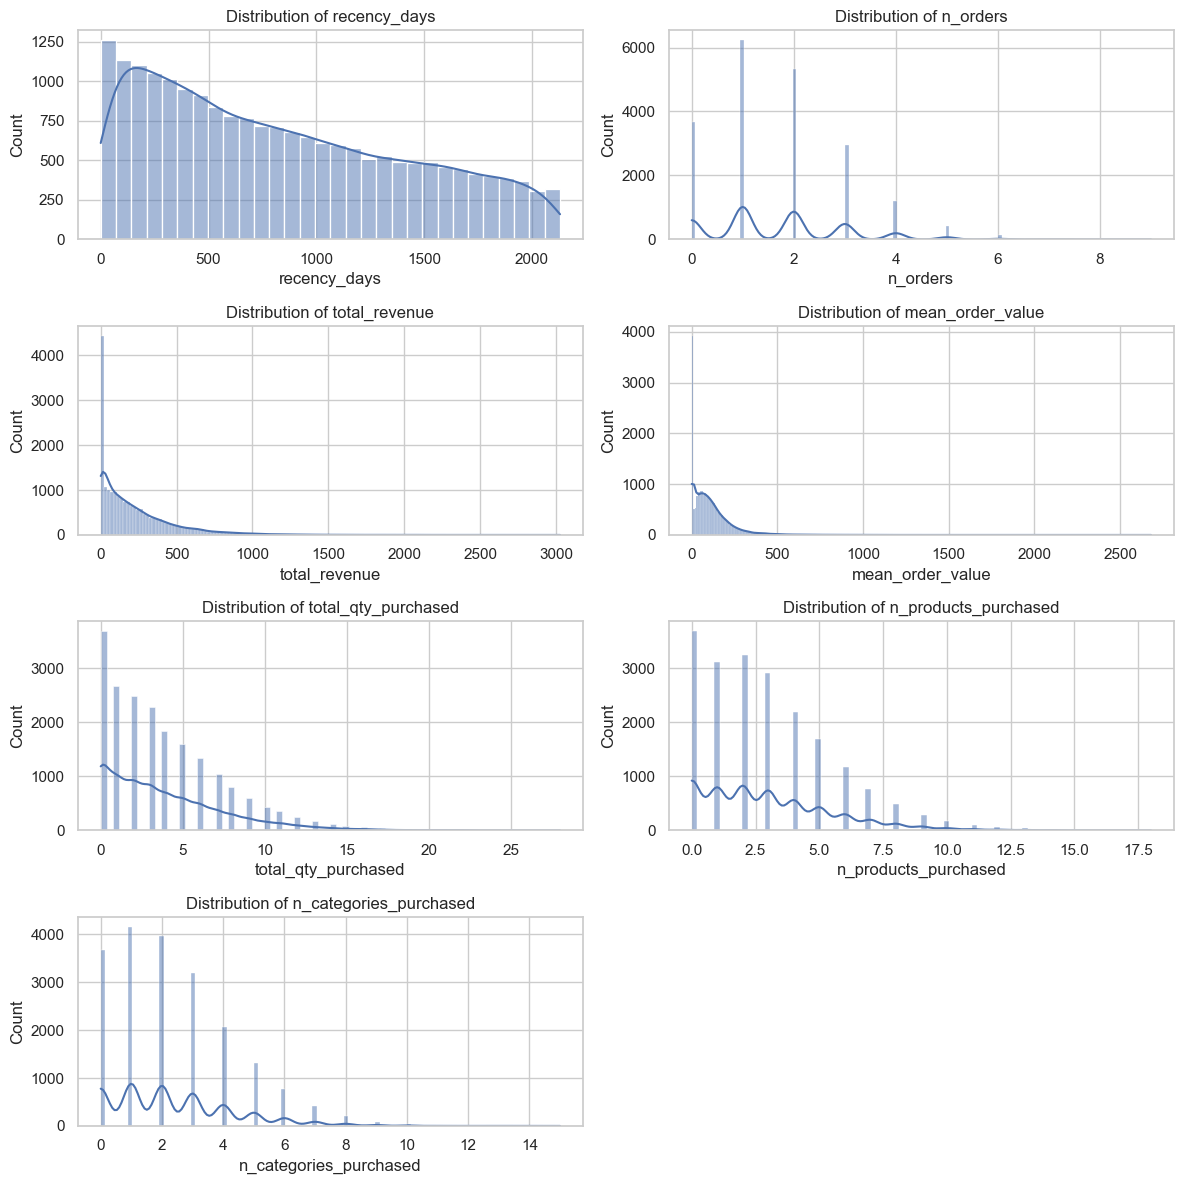

In [19]:
# Histograms for RFM features

import math

# Filter only columns that exist in df
rfm_cols = [col for col in rfm_features if col in df.columns]

# Determine grid size
n = len(rfm_cols)
cols = 2                          # number of histogram columns
rows = math.ceil(n / cols)        # number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()  # flatten to make indexing easier

# Plot each histogram
for i, col in enumerate(rfm_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Turn off any empty subplot boxes
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Code separator

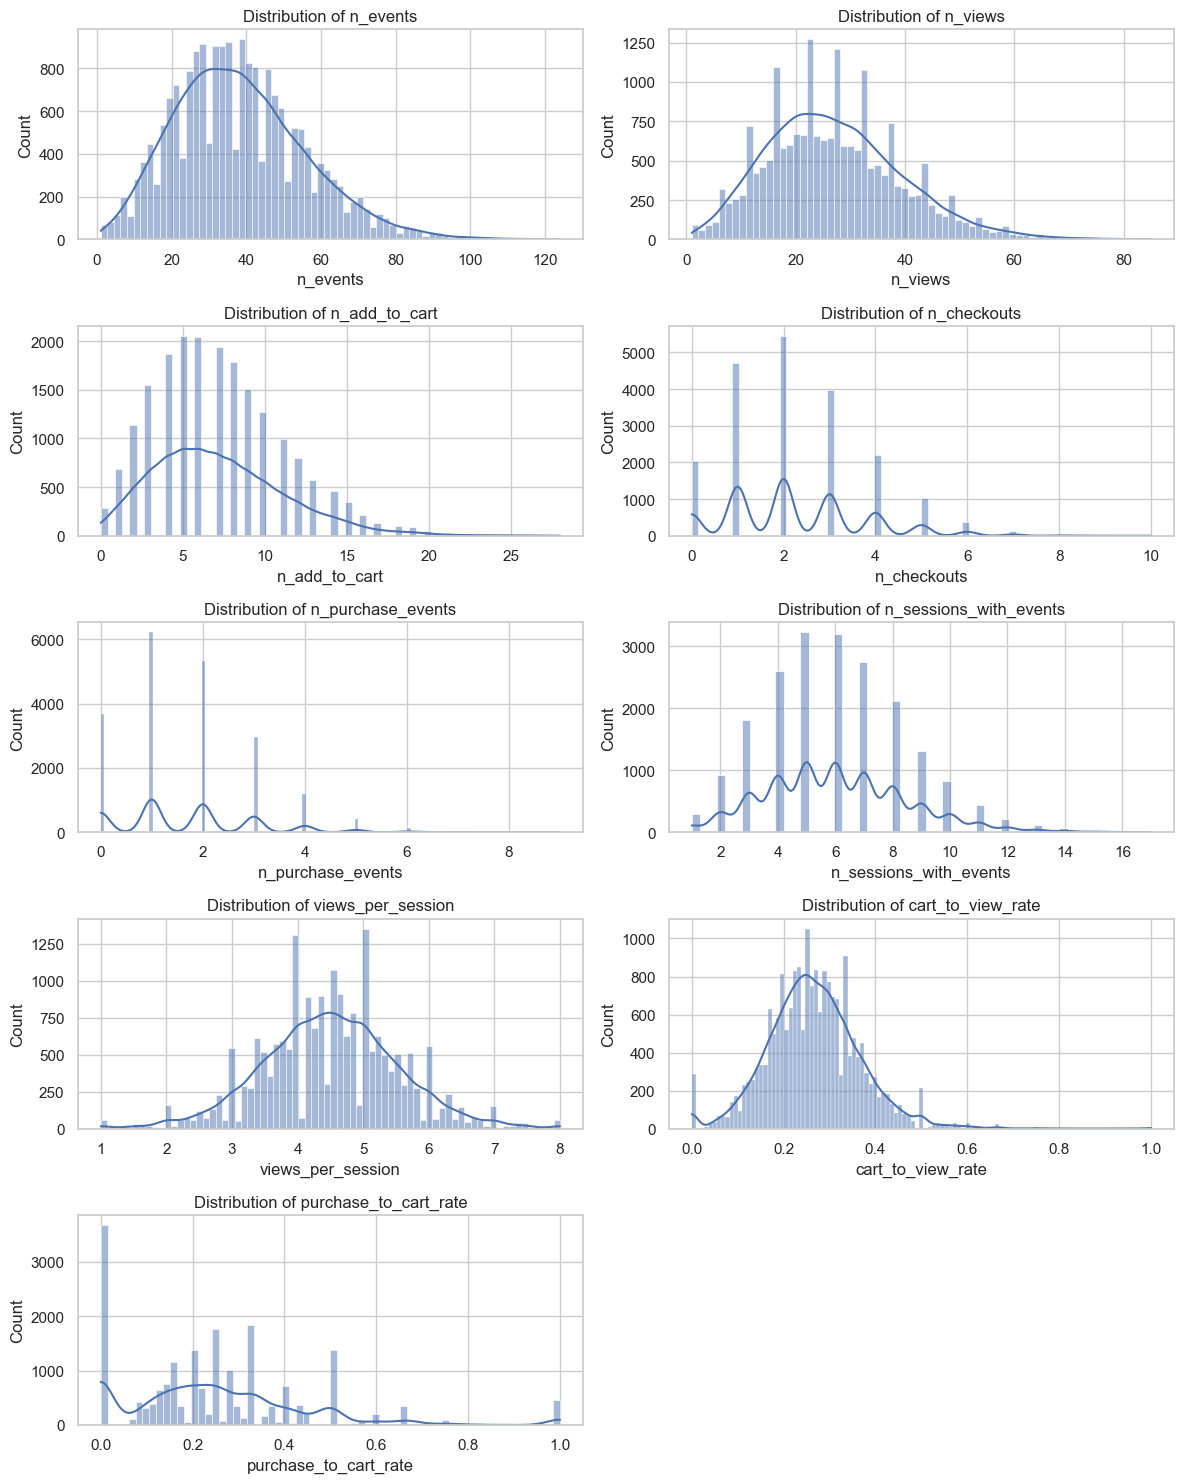

In [20]:
# Histogram for funnel features

# Filter only columns that exist in df
funnel_cols = [col for col in funnel_features if col in df.columns]

# Determine grid size
n = len(funnel_cols)
cols = 2                          # number of histogram columns
rows = math.ceil(n / cols)        # number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()  # flatten for easy indexing

# Plot each histogram
for i, col in enumerate(funnel_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Turn off any unused subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

# Clean up layout
plt.tight_layout()

plt.show()


## Outlier Detection & Skewness Checks
Check for extreme values in key continuous features that might affect clustering.

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - The outlier table reflects normal e-commerce behavior.
    - Outliers likely represent real, meaningful customer segments
    - The outliers should not be removed
    - Use scaling + log transformations to manage skew and range
</div>

#### code and output for IQR-based outlier count, refer to appendix for more code on skewness and outliers

In [21]:
# 5 IQR-based outlier count for selected numeric columns

boxplot_cols = rfm_features + funnel_features
boxplot_cols = [c for c in boxplot_cols if c in df.columns]

def count_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers, lower, upper

outlier_summary = []

for col in boxplot_cols:
    s = df[col].dropna()
    n_outliers, lower, upper = count_iqr_outliers(s)
    outlier_summary.append({
        "feature": col,
        "n_outliers": n_outliers,
        "pct_outliers": round(100 * n_outliers / len(s), 2),
        "lower_bound": round(lower, 2),
        "upper_bound": round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("pct_outliers", ascending=False)
outlier_df


,feature,n_outliers,pct_outliers,lower_bound,upper_bound
1,n_orders,1770,8.87,-0.50,3.50
11,n_purchase_events,1770,8.87,-0.50,3.50
15,purchase_to_cart_rate,947,4.75,-0.19,0.65
2,total_revenue,908,4.55,-402.73,759.19
3,mean_order_value,852,4.27,-157.96,336.88
6,n_categories_purchased,796,3.99,-2.00,6.00
5,n_products_purchased,694,3.48,-3.50,8.50
14,cart_to_view_rate,526,2.64,0.01,0.51
4,total_qty_purchased,401,2.01,-6.50,13.50
13,views_per_session,323,1.62,1.83,7.17


## Bivariate Relationships & Correlations
Examine relationships between key numeric features and check for multicollinearity.

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - PCA IS CRITCAL STEP FOR PRE-PROCESSING TO ADDRESS MULTIPLE HIGHLY CORRELATED CLUSTERS
    
    - OTHER OBSERVATIONS / INSIGHTS:
    - as expected: monetary, frequency and quantity are highly correlated
    - also expected: engagement and funnel activity are strongly correlated
    - recency is uniquely negative (it has negatively correlations with almost all RFM and engagement variables)
    - tenure has weak correlations, consider dropping this feature 
    - age has weak/no correlations but important for business demographoc analysis

    - OPPORTUNITY TO REDUCE CATEGORY FEATURES (Qty and Rev columns)
    - Rev is calculated using Qty, high redundancy and top candidate for dropping
    - The quantity features are sparce and have strong relationships within themselves
    - Action: Reduce quantity features into a single behavioral measures (ie. category_variety)
     
</div>

#### code for correlation heat map

In [22]:
# Correlation matrix for numeric features

corr = df[numeric_cols].corr()

corr.shape


(32, 32)

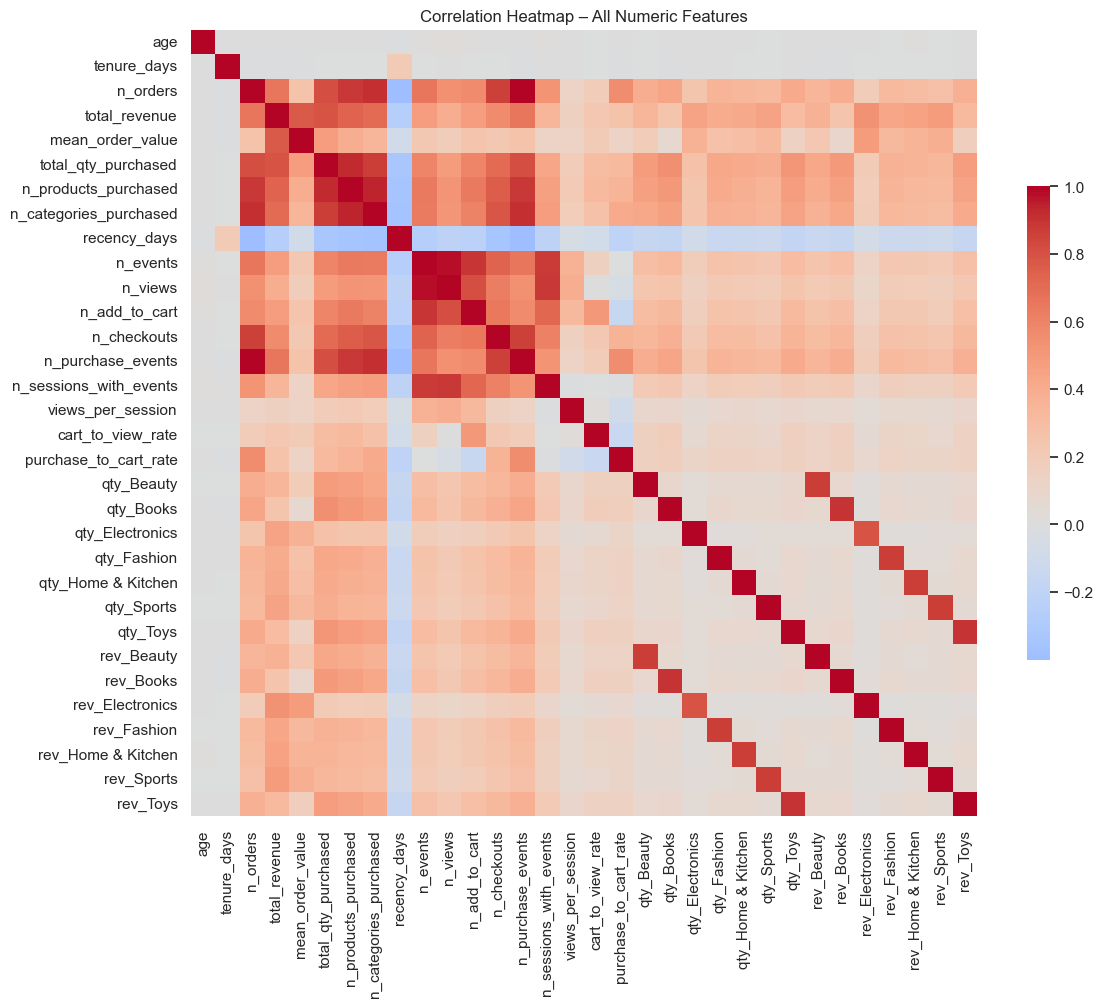

In [23]:
# Heatmap of correlations (can be large; we might focus on a subset)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap – All Numeric Features")
plt.tight_layout()

plt.show()

## Customer-Level Behavioral Profiles
Check distributions of key behavioral indicators across customers.

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - RECENCY VS. NO. OF ORDERS
    - recency and frequency are inversely related (as expected)
    - most high-frequency customers (5-9) appear at lower recency values (suggesting active loyalists)
    - at high recency (1000+ days), order count tends to be low (suggesting inactive group)
    - some exceptions: a few customers with 7-9 orders show high recency (suggesting lasped loyals > prime targe for outreach)

    - NUMBER OF ORDERS VS. TOTAL REVENUE
    - there appears to be some relationship - on average or on median, it does appear more orders > more revenue
    - but order count is not the full story, some high revenues are among those with lower order counts (2-3)
    - suggesting big basket shoppers (place fewer but high-value orders) and many low-value orders

    - RECENCY VS. TOTAL REVENUE
    - high spenders across the full recency range (suggesting "active high-value buyers" & "lapsed high-value buyers")
    - recent buyers tend to have a wide range of spend
    - no strong linear relationship
    
</div>

#### code and output for scatter plots

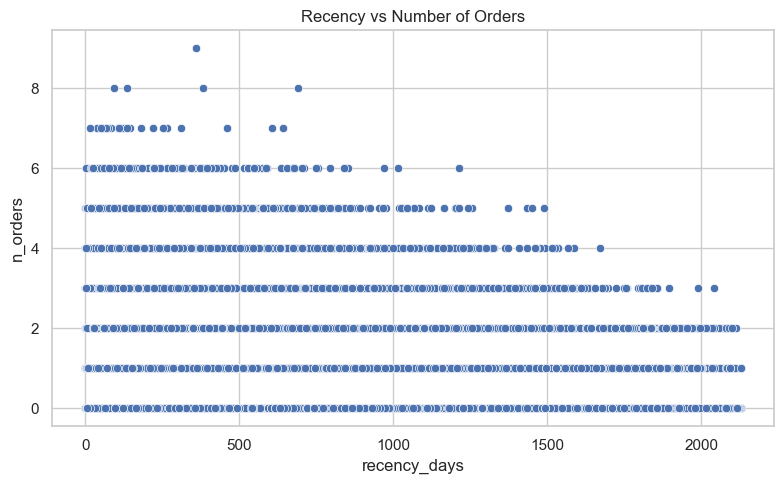

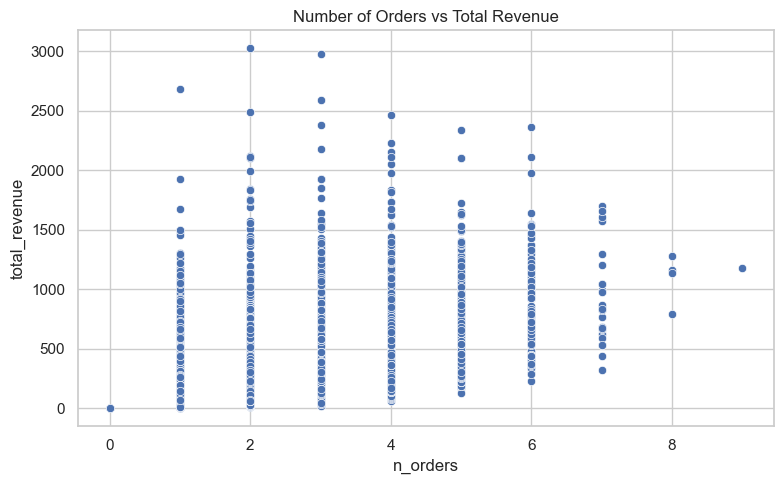

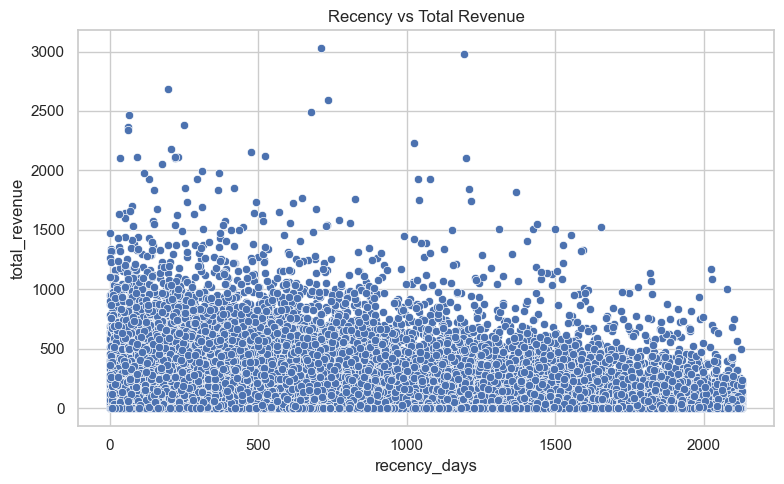

In [24]:
# Recency vs frequency vs monetary scatterplots

plt.figure()
sns.scatterplot(data=df, x="recency_days", y="n_orders")
plt.title("Recency vs Number of Orders")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df, x="n_orders", y="total_revenue")
plt.title("Number of Orders vs Total Revenue")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df, x="recency_days", y="total_revenue")
plt.title("Recency vs Total Revenue")
plt.tight_layout()
plt.show()


## Dendogram - another visual represnetation of feature correlation

<div style="background-color:#0074D9; padding:10px; border-radius:5px;">
    
    - THERE ARE TWO HUGE BLOCKS OF REDUNDANT VARIABLES - MUST BE REDUCED BEFORE PCA
    
    - Activity / Engagement Metrics
      * Keep: n_events, n_views (pure browsing behavior), n_add_to_cart (intent signal), n_orders (purchases)
      * Consider Dropping: n_sessions_with_events, n_purchase_events, n_checkouts, total_qty_purchased
      * Consider Keeping one of: n_products_purchased, n_categories_purchased
    
    - Category Quantity & Revenue Metrics
      * collapse features into engineered metric: category_variety and, potentially, category_dominance

    - Some variables provide independent signals
      * recency_days, n_orders, total_revenue, conversion metrics and (to be engineered) category_variety

    - Demographic (age, tenure) contribute almost nothing but will keep age for demographic analysis
    
</div>

#### code and output for dendogram chart

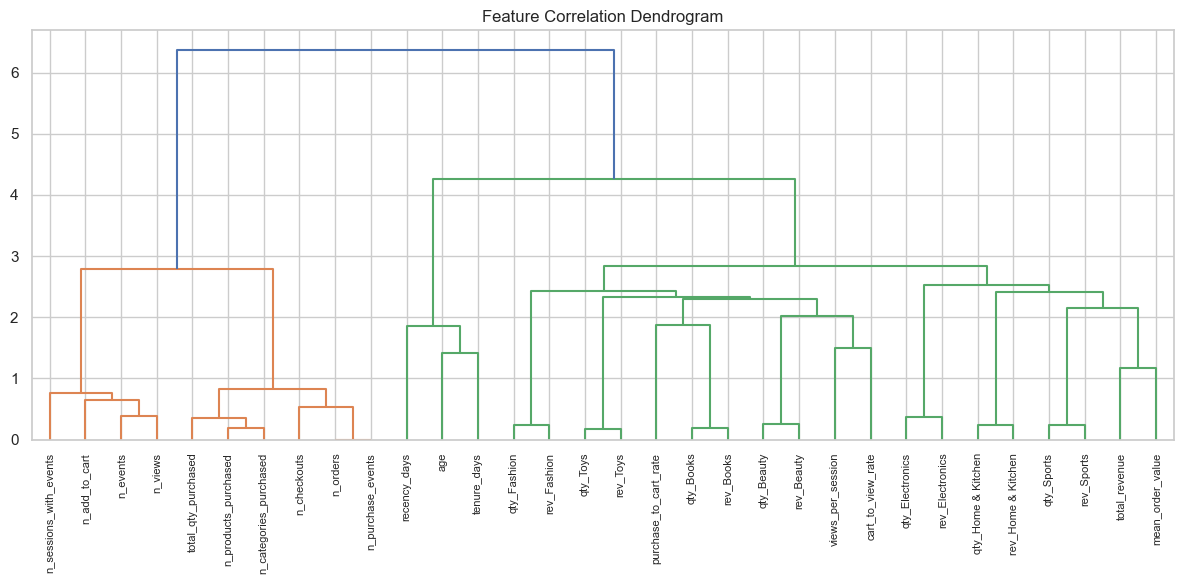

In [26]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

# Select numeric features only (exclude flags, IDs, categoricals)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                if not col.startswith("flag") 
                and col not in ["customer_id"]]

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Generate linkage matrix for dendrogram
linkage = hierarchy.linkage(corr, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendro = hierarchy.dendrogram(linkage, labels=corr.columns, leaf_rotation=90)
plt.title("Feature Correlation Dendrogram")
plt.tight_layout()
plt.show()


To do list for Pre-Processing:

keep:
n_events, n_views, n_add_to_cart, n_orders, n_products_purchased, recency_ days,  total_revenue, conversion metrics (cart_to_view_rate and purchase_to_cart rate), age

engineer *qty category features into category_variety
   then drop *qty category features
   
columns to drop:
name, email, all "flags", all "rev_" category features, n_sessions_with_events, n_purchase_events, n_checkouts, total_qty_purchased, n_categories_purchased, tenure_days, mean_order_value

log-transform all skewed features
standardize all numeric features

In [27]:
# Save the dataframe to the data folder
df.to_csv("data/customer_segmentation_eda.csv", index=False)

####
<div style="background-color:#0074D9; padding:12px; border-radius:6px;">
    <span style="color:white; font-weight:bold; font-size:16px;">
        End
    </span>
</div>

## APPENDIX - SKEWNESS AND OUTLIERS

In [26]:
# Skewness for numeric columns

skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness


rev_Electronics           7.987024
rev_Sports                5.062949
qty_Electronics           4.450414
rev_Home & Kitchen        4.098397
rev_Fashion               3.888106
qty_Sports                3.714659
rev_Beauty                3.482046
mean_order_value          3.435837
qty_Home & Kitchen        3.269429
rev_Toys                  3.154076
rev_Books                 3.084471
qty_Fashion               3.073560
qty_Beauty                2.825793
qty_Toys                  2.669224
qty_Books                 2.607898
total_revenue             2.278492
total_qty_purchased       1.288622
purchase_to_cart_rate     1.231180
n_products_purchased      1.076824
n_categories_purchased    1.031631
n_orders                  0.762837
n_purchase_events         0.762837
n_add_to_cart             0.717505
n_checkouts               0.651099
n_events                  0.559961
n_views                   0.548010
recency_days              0.457902
n_sessions_with_events    0.453219
cart_to_view_rate   

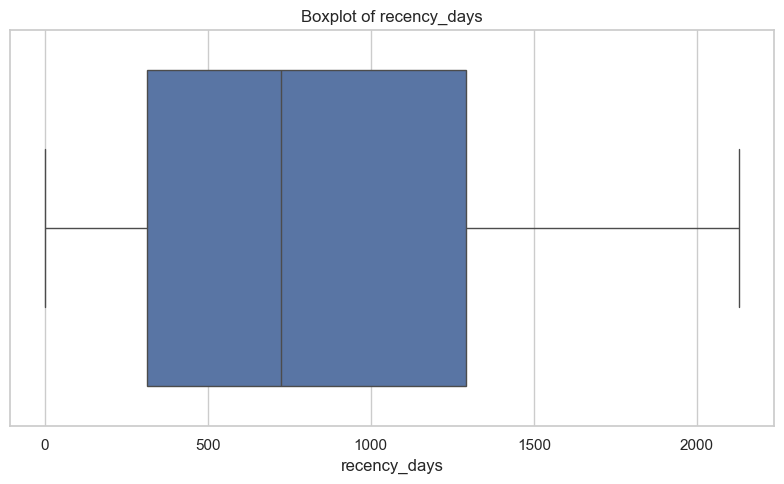

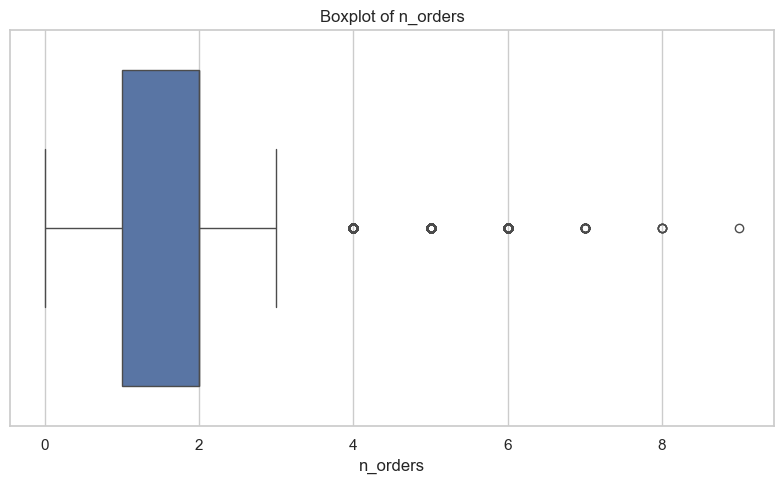

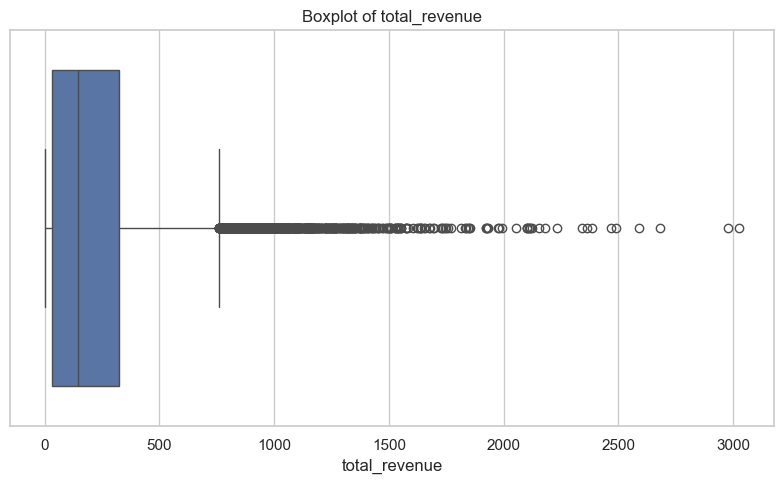

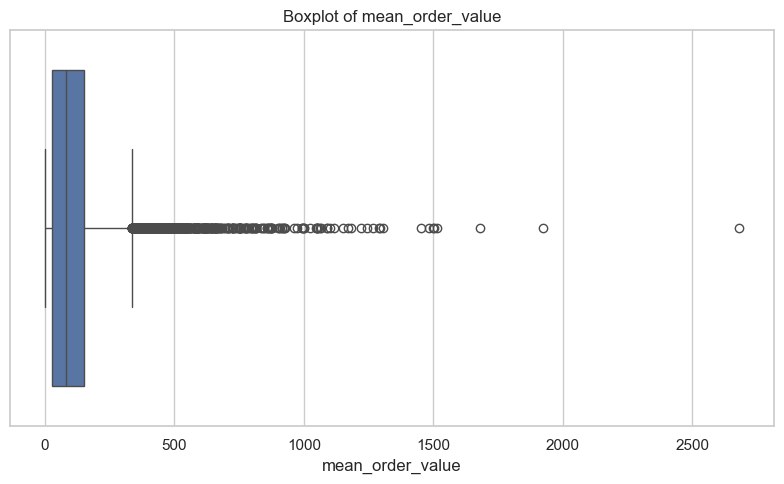

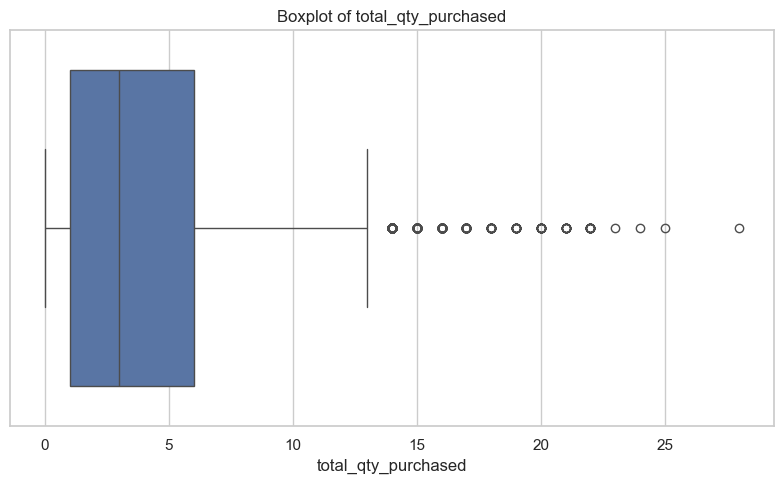

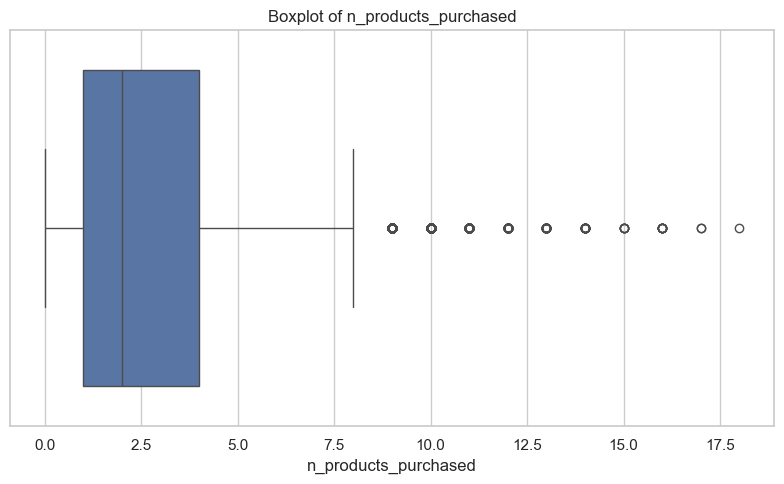

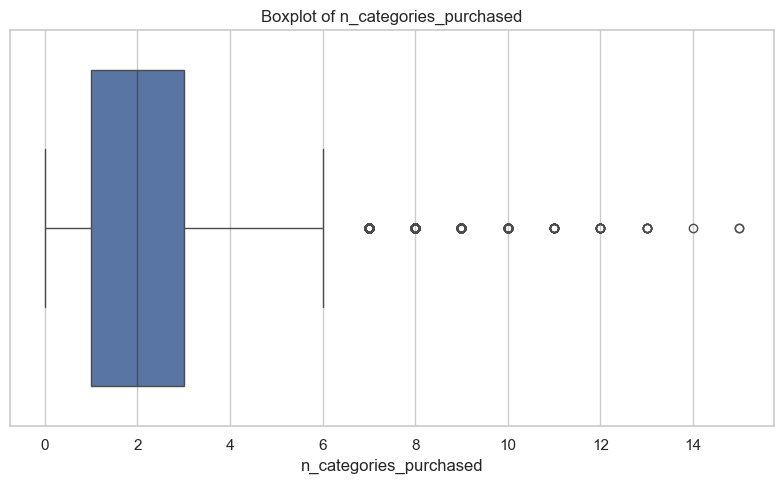

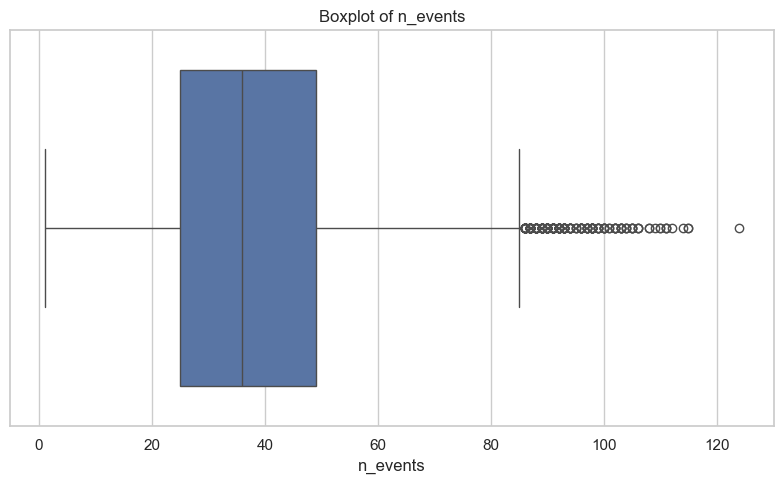

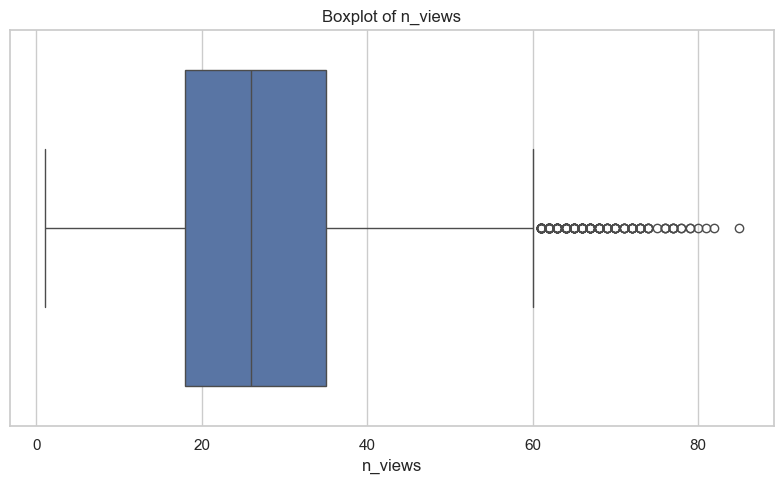

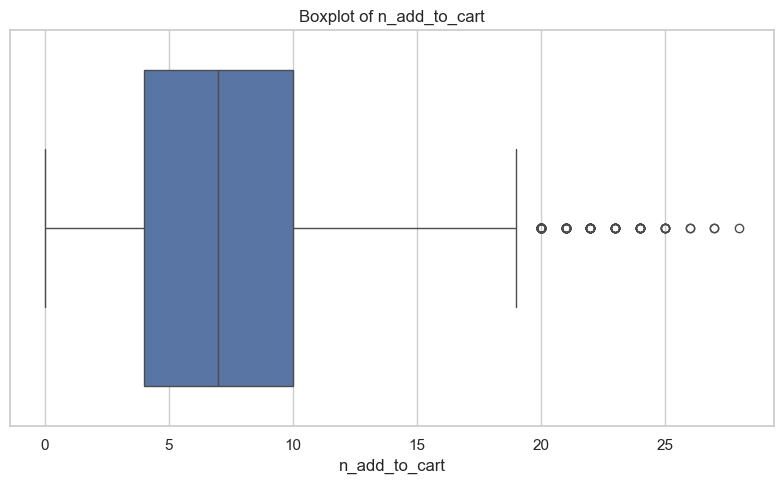

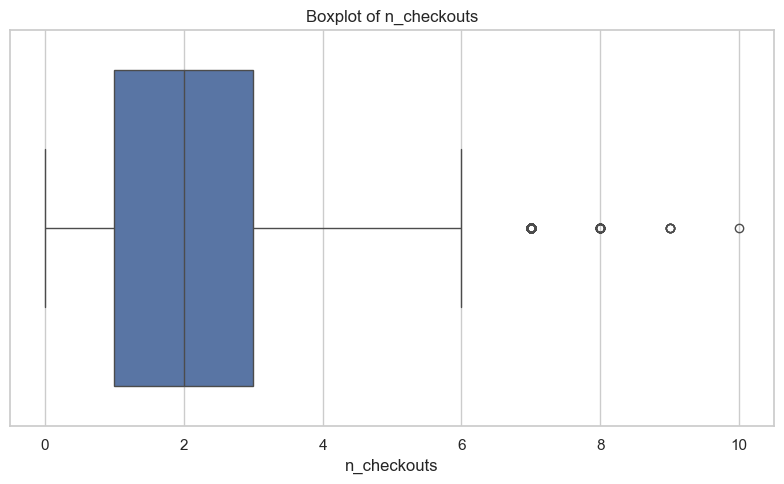

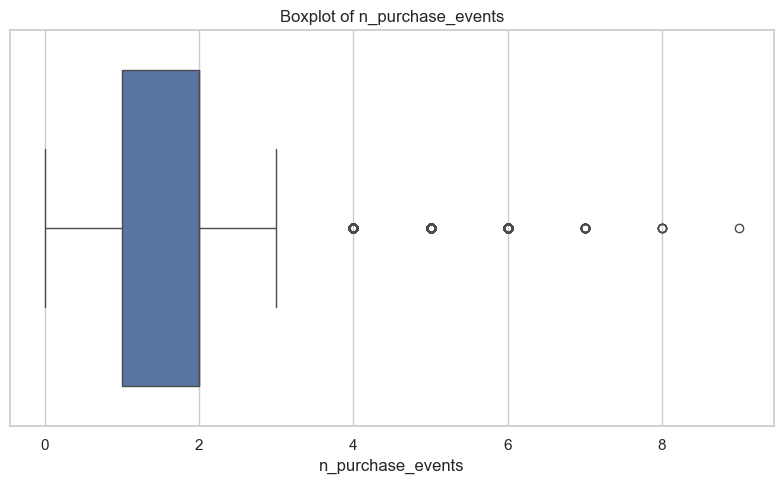

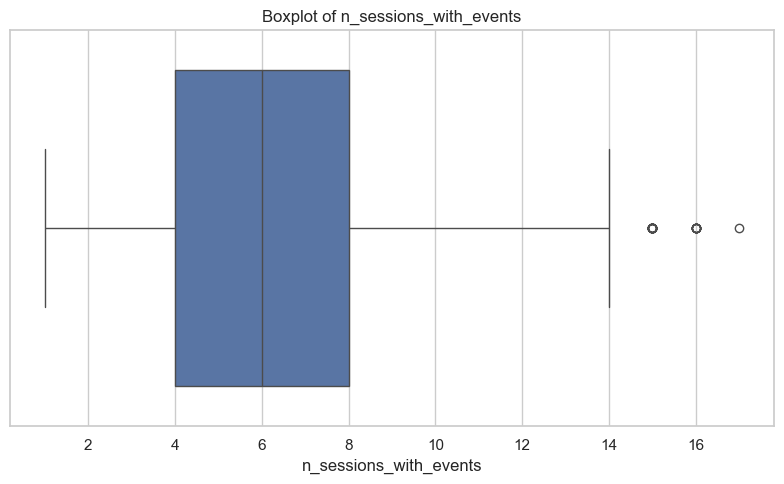

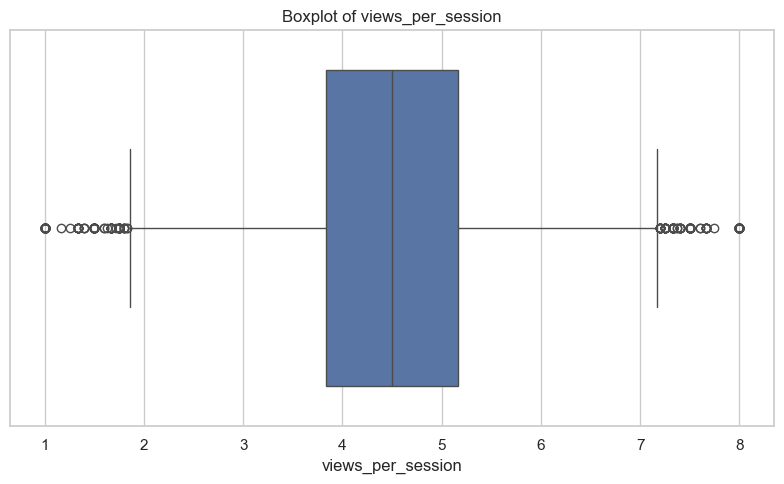

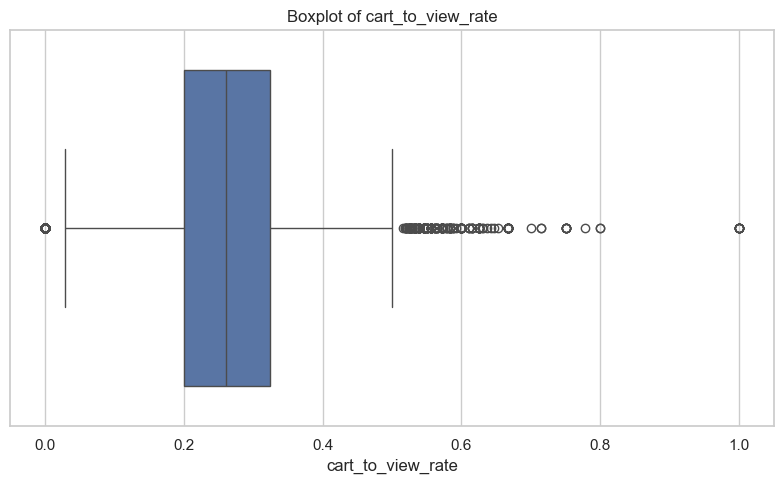

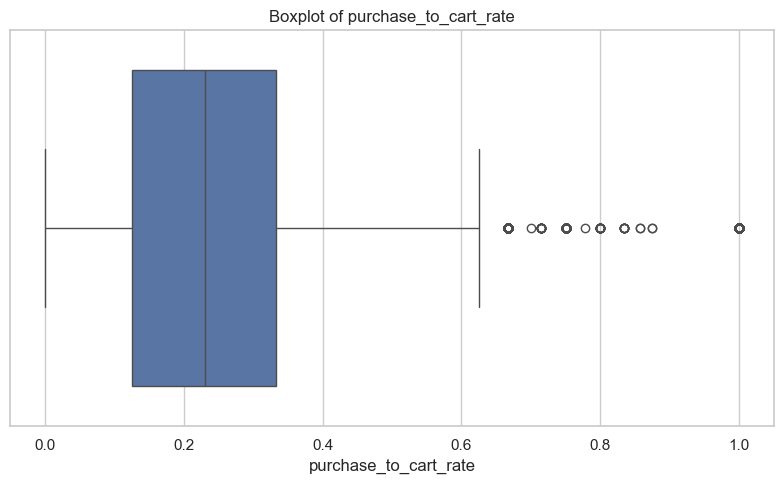

In [27]:
# Boxplots for key numeric features (RFM + funnel) - to check skewness

boxplot_cols = rfm_features + funnel_features
boxplot_cols = [c for c in boxplot_cols if c in df.columns]

for col in boxplot_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [28]:
# Top correlated pairs (absolute correlation)

corr_unstacked = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .unstack()
        .dropna()
        .abs()
        .sort_values(ascending=False)
)

top_corr_pairs = corr_unstacked.head(20)
top_corr_pairs


n_purchase_events       n_orders                  1.000000
n_views                 n_events                  0.978821
n_categories_purchased  n_products_purchased      0.941037
n_products_purchased    total_qty_purchased       0.928427
n_purchase_events       n_categories_purchased    0.908004
n_categories_purchased  n_orders                  0.908004
rev_Toys                qty_Toys                  0.901264
rev_Books               qty_Books                 0.896968
n_add_to_cart           n_events                  0.893612
n_sessions_with_events  n_views                   0.889338
n_purchase_events       n_products_purchased      0.881451
n_products_purchased    n_orders                  0.881451
n_sessions_with_events  n_events                  0.877964
n_categories_purchased  total_qty_purchased       0.872075
rev_Fashion             qty_Fashion               0.871198
rev_Home & Kitchen      qty_Home & Kitchen        0.870751
rev_Beauty              qty_Beauty                0.8694

In [29]:
# check redundancies between numerical features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numeric_cols].fillna(0)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,8.240957
1,tenure_days,4.126129
2,n_orders,inf
3,total_revenue,273.063148
4,mean_order_value,6.599160
5,total_qty_purchased,inf
6,n_products_purchased,39.927467
7,n_categories_purchased,27.894124
8,recency_days,3.621979
9,n_events,inf
